In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
!ls

sample_data  X_bp.xlsx	X_nup.xlsx


In [ ]:
data_bp = pd.read_excel("X_bp.xlsx", index_col=0)
data_nup = pd.read_excel("X_nup.xlsx", index_col=0)

In [ ]:
test=pd.DataFrame.join(data_bp, data_nup, on=None, how='inner', lsuffix='', rsuffix='', sort=False) 
test.sample(20)
data_bp=test


In [ ]:
data_bp.sample(20)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
220,2.689064,2059.842529,538.736628,137.118584,25.401720,263.387024,1004.066062,68.062377,2643.225518,294.421622,0,7.961503,63.665478
297,2.903233,2013.100967,784.799213,114.294481,21.949834,213.654636,252.957779,76.809950,3031.734390,277.279708,0,2.511704,56.270950
486,3.290879,2037.898856,702.612297,87.067519,20.746711,335.026336,372.217131,72.039053,2232.096572,206.981036,0,6.505182,59.304158
759,3.460576,2070.530524,148.258590,76.858347,24.209401,268.288453,716.274381,70.364622,2039.609992,205.546133,90,5.376332,52.977356
32,3.277087,2010.047012,339.550423,67.498993,24.280609,254.949084,117.535234,67.478707,2462.605386,207.018581,90,9.000000,47.000000
472,1.940663,1973.867201,229.112347,123.308874,22.566069,291.028253,655.775886,69.867260,2135.921724,246.585104,0,9.938280,46.014723
547,2.364326,1863.594513,836.655016,119.522637,24.195132,326.804350,748.840939,75.581574,2805.836339,177.812580,90,11.424390,44.292002
43,1.193530,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,73.454695,2335.541792,91.047646,0,7.526398,38.176975
186,1.584453,2050.583051,486.635729,136.187796,23.184165,234.019507,1040.466645,70.706532,2510.792879,132.378179,0,6.968698,61.289802
87,2.527102,2021.856395,881.137150,132.653525,22.447282,255.190945,194.049749,72.271183,3214.534809,220.557908,0,5.592613,84.840888


In [ ]:
from sklearn.model_selection import train_test_split

y_elasticity = data_bp["Модуль упругости при растяжении, ГПа"]
y_strength = data_bp["Прочность при растяжении, МПа"]

x_elasticity = data_bp.drop(columns=["Модуль упругости при растяжении, ГПа"])
x_strength = data_bp.drop(columns=["Прочность при растяжении, МПа"])


x_train_elasticity, x_test_elasticity, y_train_elasticity, y_test_elasticity = train_test_split(x_elasticity, y_elasticity, test_size=0.3, random_state=10)

x_train_strength, x_test_strength, y_train_strength, y_test_strength = train_test_split(x_strength, y_strength, test_size=0.3, random_state=10)




In [ ]:
x_train_elasticity, x_test_elasticity, y_train_elasticity, y_test_elasticity = train_test_split(x_elasticity, y_elasticity, test_size=0.3, random_state=10)

x_train_strength, x_test_strength, y_train_strength, y_test_strength = train_test_split(x_strength, y_strength, test_size=0.3, random_state=10)

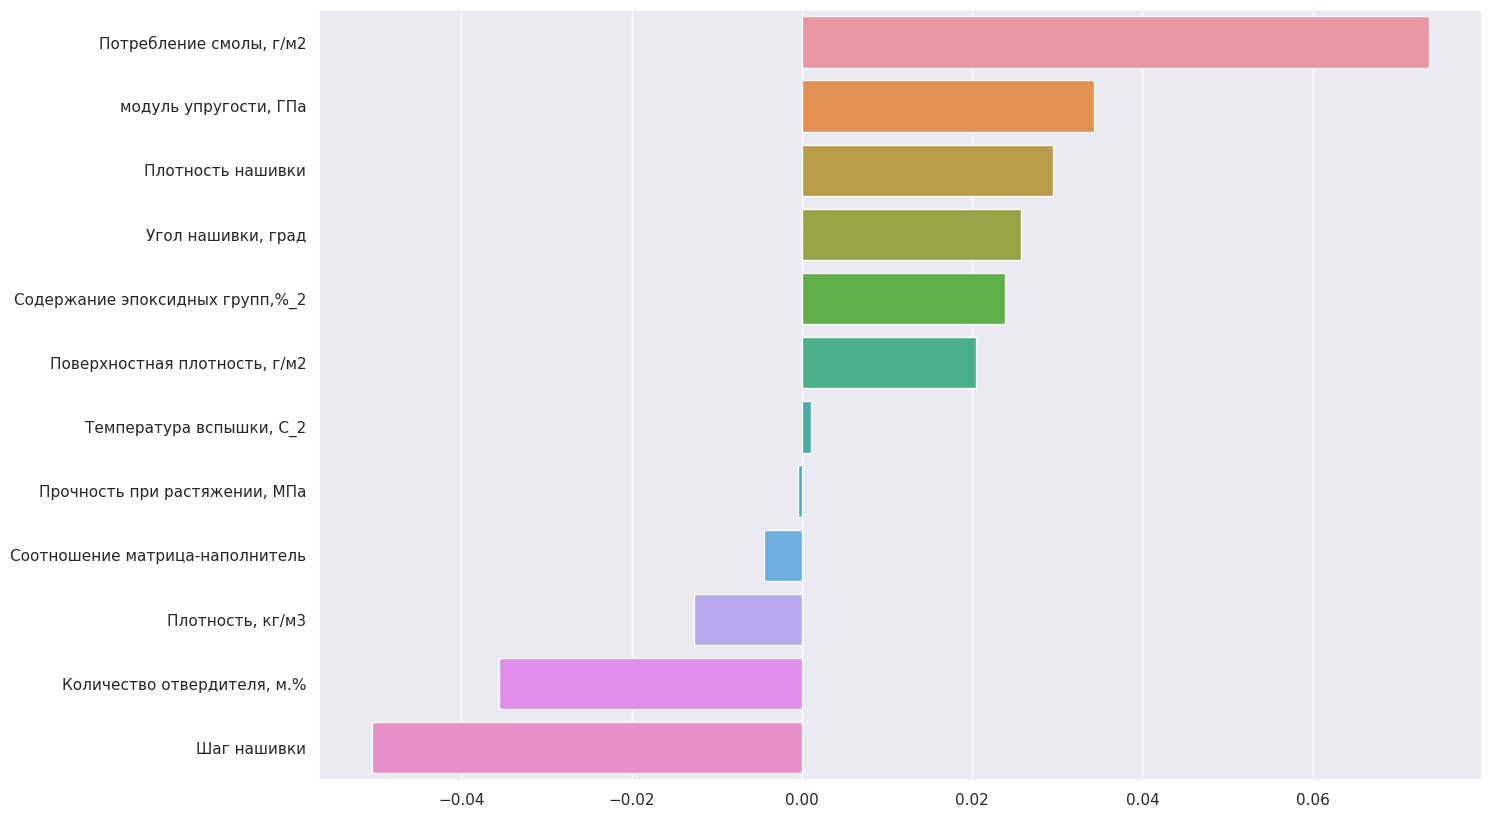

In [ ]:
correlations_elasticity = x_train_elasticity.corrwith(y_train_elasticity).sort_values(ascending=False)

plot = sns.barplot(y=correlations_elasticity.index, x=correlations_elasticity)
plot.figure.set_size_inches(15, 10)

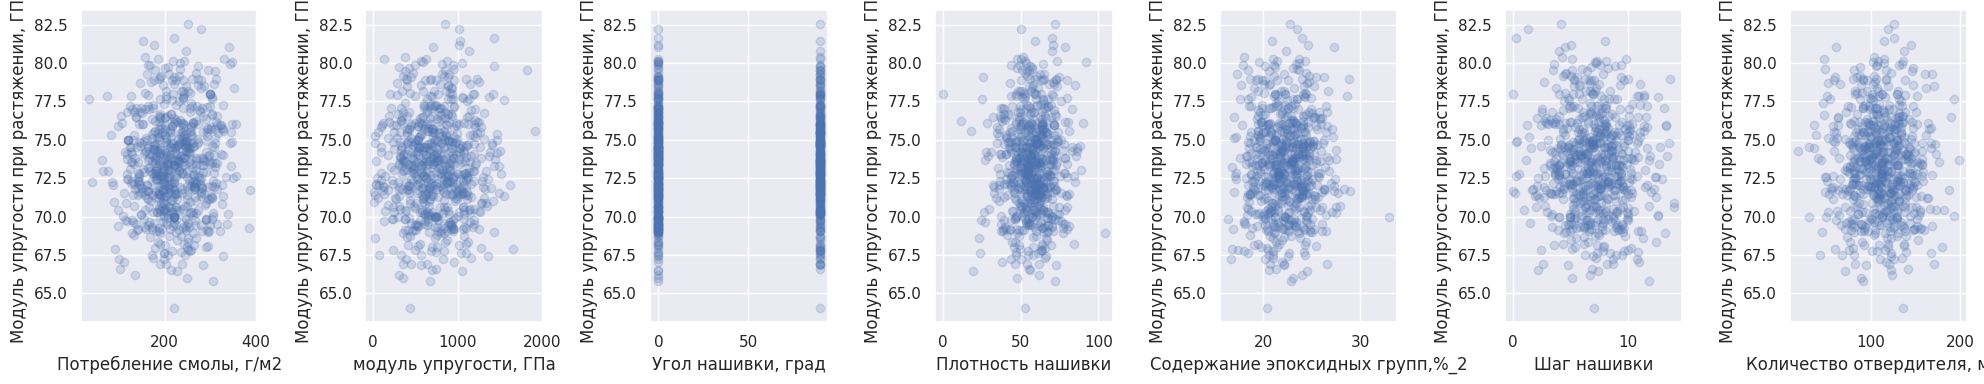

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4), ncols=7)
for i, feature in enumerate(['Потребление смолы, г/м2', 'модуль упругости, ГПа',
       'Угол нашивки, град', 'Плотность нашивки', 'Содержание эпоксидных групп,%_2',
       'Шаг нашивки', 'Количество отвердителя, м.%']):
    axs[i].scatter(x_train_elasticity[feature], y_train_elasticity, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Модуль упругости при растяжении, ГПа")
plt.tight_layout()

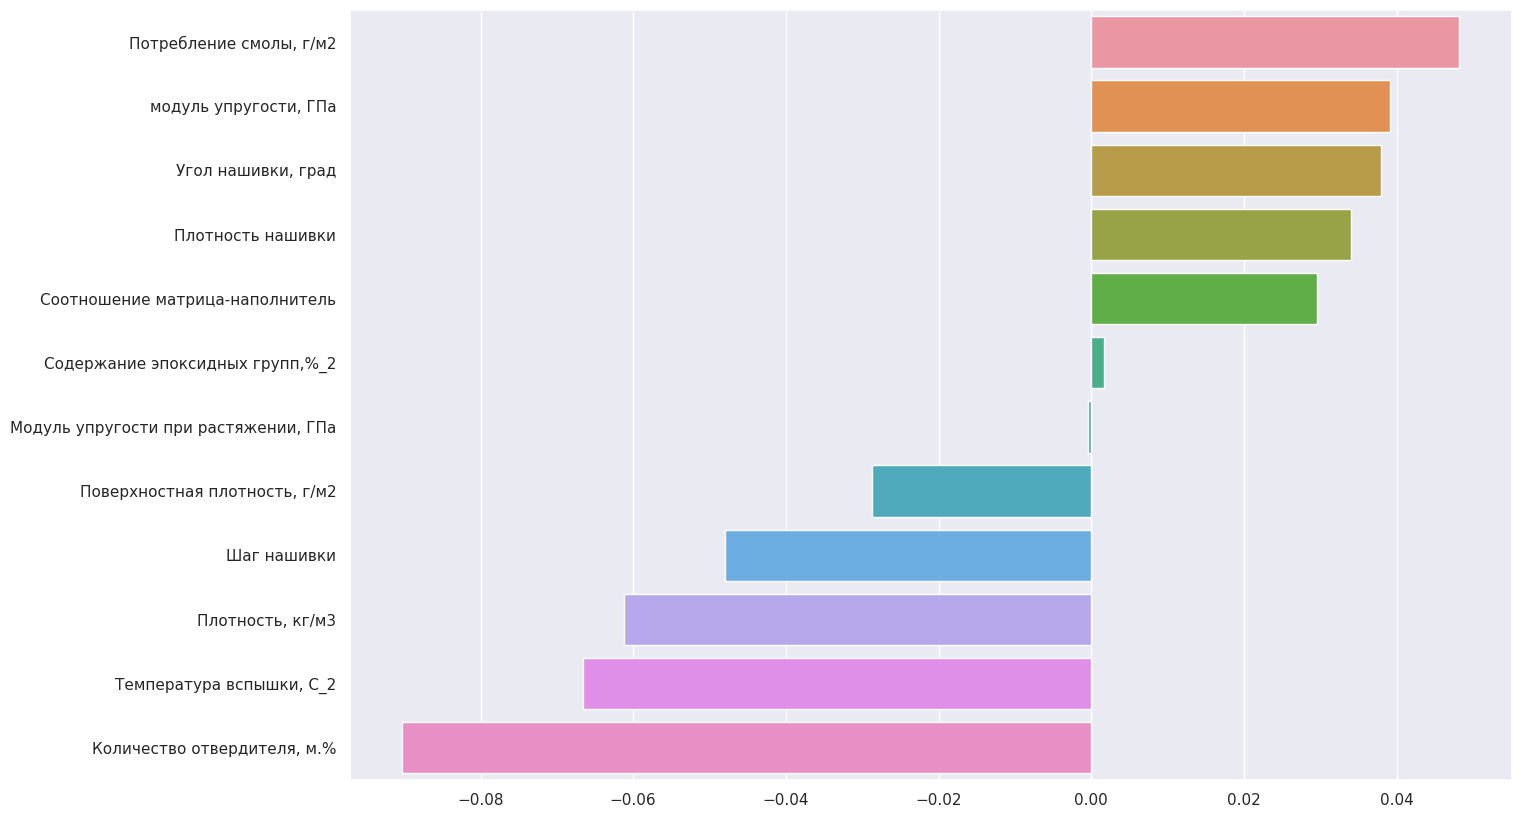

In [ ]:
correlations_strength = x_train_strength.corrwith(y_train_strength).sort_values(ascending=False)

plot = sns.barplot(y=correlations_strength.index, x=correlations_strength)
plot.figure.set_size_inches(15, 10)

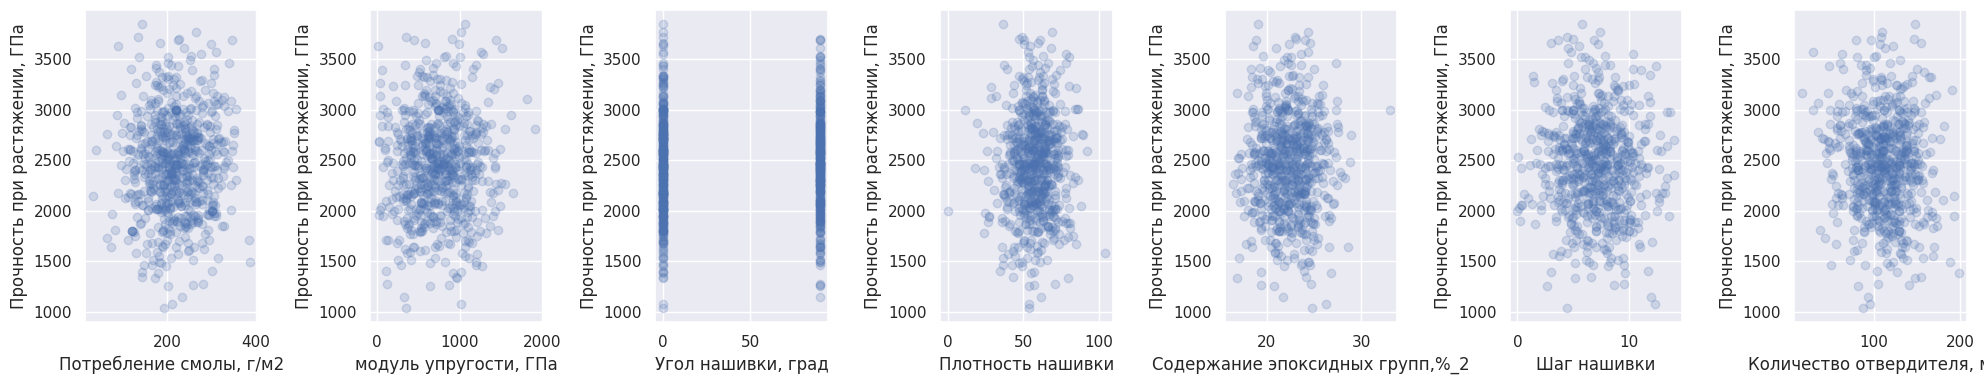

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4), ncols=7)
for i, feature in enumerate(['Потребление смолы, г/м2', 'модуль упругости, ГПа',
       'Угол нашивки, град', 'Плотность нашивки', 'Содержание эпоксидных групп,%_2',
       'Шаг нашивки', 'Количество отвердителя, м.%']):
    axs[i].scatter(x_train_strength[feature], y_train_strength, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Прочность при растяжении, ГПа")
plt.tight_layout()

In [ ]:
correlations_strength.index

Index(['Потребление смолы, г/м2', 'модуль упругости, ГПа',
       'Угол нашивки, град', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Содержание эпоксидных групп,%_2',
       'Модуль упругости при растяжении, ГПа', 'Поверхностная плотность, г/м2',
       'Шаг нашивки', 'Плотность, кг/м3', 'Температура вспышки, С_2',
       'Количество отвердителя, м.%'],
      dtype='object')

In [ ]:
x_elasticity = data_bp.drop(columns=["Модуль упругости при растяжении, ГПа",
                                     "Прочность при растяжении, МПа",
                                     "Температура вспышки, С_2",
                                     "Соотношение матрица-наполнитель",
                                     "Плотность, кг/м3"])


x_strength = data_bp.drop(columns=["Модуль упругости при растяжении, ГПа",
                                   "Поверхностная плотность, г/м2", 
                                   "Плотность, кг/м3",
                                   "Температура вспышки, С_2",
                                   "Прочность при растяжении, МПа"])


In [ ]:
x_strength

,Соотношение матрица-наполнитель,"модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,738.736842,30.000000,22.267857,220.000000,0,4.000000,57.000000
1,1.857143,738.736842,50.000000,23.750000,220.000000,0,4.000000,60.000000
2,1.857143,738.736842,49.900000,33.000000,220.000000,0,4.000000,70.000000
3,1.857143,738.736842,129.000000,21.250000,220.000000,0,5.000000,47.000000
4,2.771331,753.000000,111.860000,22.267857,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...
1018,2.271346,912.855545,86.992183,20.123249,125.007669,90,9.076380,47.019770
1019,3.444022,444.732634,145.981978,19.599769,117.730099,90,10.565614,53.750790
1020,3.280604,416.836524,110.533477,23.957502,236.606764,90,4.161154,67.629684
1021,3.705351,741.475517,141.397963,19.246945,197.126067,90,6.313201,58.261074


Разделяем датасет на обучающую и тестирующую подборку

In [ ]:
x_train_elasticity, x_test_elasticity, y_train_elasticity, y_test_elasticity = train_test_split(x_elasticity, y_elasticity, test_size=0.3, random_state=10)

x_train_strength, x_test_strength, y_train_strength, y_test_strength = train_test_split(x_strength, y_strength, test_size=0.3, random_state=10)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [ ]:
#train_elasticity
listModels = [Lasso, LinearRegression, Ridge, ElasticNet]
MinErrElast=np.Inf
MinErrStren=np.Inf
MinModelElast="test"
MinModelStren="test"

for i in range(4):

  pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', listModels[i]())
  ])

  model_elasticity = pipeline.fit(x_train_elasticity, y_train_elasticity)
  y_pred_elasticity = model_elasticity.predict(x_test_elasticity)
  error = mean_squared_error(y_test_elasticity, y_pred_elasticity, squared=False)
  print("Test RMSE = %.4f" % error)
  if error < MinErrElast:
    MinErrElast=error
    MinModelElast=listModels[i]

  model_strength = pipeline.fit(x_train_strength, y_train_strength)
  y_pred_strength = model_strength.predict(x_test_strength)
  error = mean_squared_error(y_test_strength, y_pred_strength, squared=False)
  print("Test RMSE = %.4f" % error)
  if error < MinErrStren:
    MinErrStren=error
    MinModelStren=listModels[i]



Test RMSE = 3.1125
Test RMSE = 493.5473
Test RMSE = 3.1063
Test RMSE = 493.8133
Test RMSE = 3.1063
Test RMSE = 493.8069
Test RMSE = 3.1125
Test RMSE = 492.7569


In [ ]:
print(MinModelElast)
print(MinErrElast)

<class 'sklearn.linear_model._ridge.Ridge'>
3.106256017088909


In [ ]:
print(MinModelStren)
print(MinErrStren)

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
492.7569028402936


Как видим для Упругости лучше подошла модель Ridge, а для Прочности - ElasticNet

In [ ]:
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression',Ridge())
  ])

model_elasticity = pipeline.fit(x_train_elasticity, y_train_elasticity)
y_pred_elasticity = model_elasticity.predict(x_test_elasticity)


pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression',ElasticNet())
  ])


model_strength = pipeline.fit(x_train_strength, y_train_strength)
y_pred_strength = model_strength.predict(x_test_strength)




In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test_elasticity, y_pred_elasticity)

-0.00048575140363560365

In [ ]:
r2_score(y_test_strength, y_pred_strength)

0.0017746781432734782

Далее напишем нашу нейронную сеть

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
type(x_train_strength)

pandas.core.frame.DataFrame

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(x_train_strength.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

In [ ]:
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [ ]:
history = model.fit(x_train_strength, 
                    y_train_strength, 
                    epochs=10000, 
                    validation_data=(x_test_strength, y_test_strength), 
                    verbose=2)

Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 7501/10000
23/23 - 0s - loss: 225911.4219 - mae: 376.9771 - val_loss: 283863.0938 - val_mae: 425.7884 - 63ms/epoch - 3ms/step
Epoch 7502/10000
23/23 - 0s - loss: 225929.1406 - mae: 377.7668 - val_loss: 283252.2500 - val_mae: 425.4544 - 56ms/epoch - 2ms/step
Epoch 7503/10000
23/23 - 0s - loss: 225791.1250 - mae: 376.1167 - val_loss: 283499.7500 - val_mae: 424.9314 - 59ms/epoch - 3ms/step
Epoch 7504/10000
23/23 - 0s - loss: 226127.9062 - mae: 378.4838 - val_loss: 280976.3125 - val_mae: 423.1239 - 80ms/epoch - 3ms/step
Epoch 7505/10000
23/23 - 0s - loss: 225817.4375 - mae: 377.3105 - val_loss: 286323.2500 - val_mae: 425.2936 - 56ms/epoch - 2ms/step
Epoch 7506/10000
23/23 - 0s - loss: 227044.7656 - mae: 379.2673 - val_loss: 283107.1562 - val_mae: 425.7927 - 70ms/epoch - 3ms/step
Epoch 7507/10000
23/23 - 0s - loss: 226215.5781 - mae: 377.2712 - val_loss: 284044.6875 - val_mae: 426.0452 - 60ms/epoch - 3ms/step
Epoch 75

In [ ]:
mse = history.history['mae']
val_mse = history.history['val_mae']
epochs = range(1, len(mse) + 1)

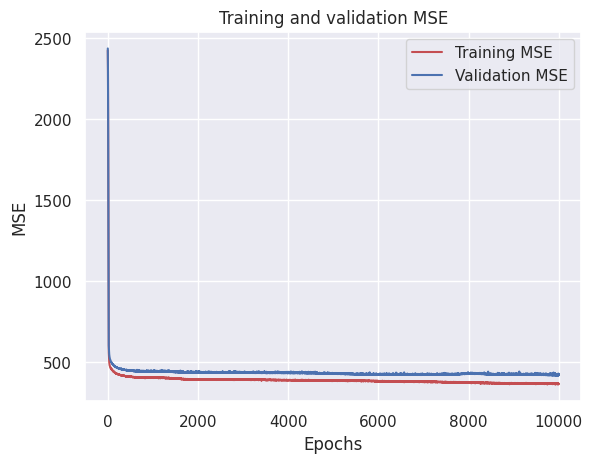

In [ ]:
plt.plot(epochs, mse, 'r', label='Training MSE')
plt.plot(epochs, val_mse, 'b', label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
y_pred_strength = model.predict(x_test_strength)
error = mean_squared_error(y_test_strength, y_pred_strength, squared=False)
print("Test RMSE = %.4f" % error)

10/10 [==============================] - 0s 1ms/step
Test RMSE = 544.8656


In [ ]:
history = model.fit(x_train_strength, 
                    y_train_strength, 
                    epochs=400, 
                    validation_data=(x_test_strength, y_test_strength), 
                    verbose=2)

Epoch 1/400
23/23 - 0s - loss: 216028.4531 - mae: 368.5442 - val_loss: 286060.3125 - val_mae: 423.3307 - 96ms/epoch - 4ms/step
Epoch 2/400
23/23 - 0s - loss: 215880.6406 - mae: 366.6506 - val_loss: 285187.0312 - val_mae: 421.3121 - 64ms/epoch - 3ms/step
Epoch 3/400
23/23 - 0s - loss: 215884.2969 - mae: 367.6910 - val_loss: 288025.5000 - val_mae: 422.0150 - 67ms/epoch - 3ms/step
Epoch 4/400
23/23 - 0s - loss: 217138.9219 - mae: 369.6135 - val_loss: 284279.6875 - val_mae: 420.8248 - 69ms/epoch - 3ms/step
Epoch 5/400
23/23 - 0s - loss: 215390.7188 - mae: 366.7719 - val_loss: 287749.6875 - val_mae: 421.3643 - 66ms/epoch - 3ms/step
Epoch 6/400
23/23 - 0s - loss: 216830.5469 - mae: 368.7429 - val_loss: 283335.4375 - val_mae: 419.9080 - 88ms/epoch - 4ms/step
Epoch 7/400
23/23 - 0s - loss: 215754.5000 - mae: 367.8010 - val_loss: 282737.3125 - val_mae: 420.4774 - 86ms/epoch - 4ms/step
Epoch 8/400
23/23 - 0s - loss: 214929.7812 - mae: 367.0518 - val_loss: 282806.3125 - val_mae: 419.2985 - 67ms/e

In [ ]:
y_pred_strength = model.predict(x_test_strength)
error = mean_squared_error(y_test_strength, y_pred_strength, squared=False)
print("Test RMSE = %.4f" % error)

10/10 [==============================] - 0s 1ms/step
Test RMSE = 530.3916


In [ ]:
x_train_elasticity.shape

(716, 8)

In [ ]:
model2 = Sequential()
model2.add(Dense(8, activation='relu', input_shape=(x_train_elasticity.shape[1],)))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='relu'))

In [ ]:
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history2 = model2.fit(x_train_elasticity, 
                    y_train_elasticity, 
                    epochs=10000, 
                    validation_data=(x_test_elasticity, y_test_elasticity), 
                    verbose=2)

Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 7501/10000
23/23 - 0s - loss: 9.1353 - mae: 2.4303 - val_loss: 11.6269 - val_mae: 2.7380 - 61ms/epoch - 3ms/step
Epoch 7502/10000
23/23 - 0s - loss: 9.2396 - mae: 2.4401 - val_loss: 11.6917 - val_mae: 2.7020 - 62ms/epoch - 3ms/step
Epoch 7503/10000
23/23 - 0s - loss: 9.1322 - mae: 2.3949 - val_loss: 10.8852 - val_mae: 2.6305 - 71ms/epoch - 3ms/step
Epoch 7504/10000
23/23 - 0s - loss: 9.1316 - mae: 2.4219 - val_loss: 10.9677 - val_mae: 2.6680 - 70ms/epoch - 3ms/step
Epoch 7505/10000
23/23 - 0s - loss: 9.1027 - mae: 2.4099 - val_loss: 11.1430 - val_mae: 2.6750 - 76ms/epoch - 3ms/step
Epoch 7506/10000
23/23 - 0s - loss: 9.3928 - mae: 2.4488 - val_loss: 12.8710 - val_mae: 2.8351 - 64ms/epoch - 3ms/step
Epoch 7507/10000
23/23 - 0s - loss: 9.2503 - mae: 2.4182 - val_loss: 11.1008 - val_mae: 2.6664 - 73ms/epoch - 3ms/step
Epoch 7508/10000
23/23 - 0s - loss: 9.3071 - mae: 2.4326 - val_loss: 11.0548 - val_mae: 2.6610 - 74

In [ ]:
mse2 = history2.history['mae']
val_mse2 = history2.history['val_mae']
epochs2 = range(1, len(mse2) + 1)

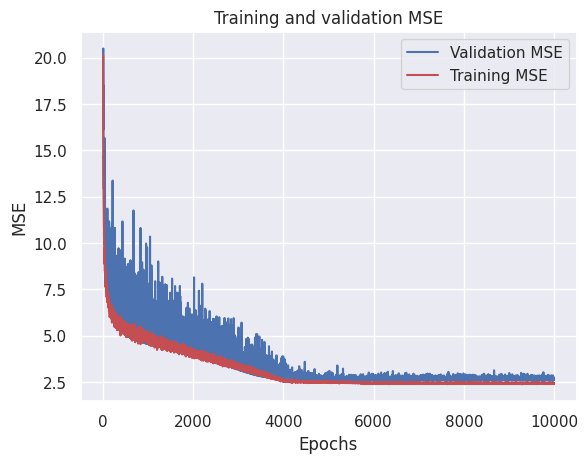

In [ ]:
plt.plot(epochs2, val_mse2, 'b', label='Validation MSE')
plt.plot(epochs2, mse2, 'r', label='Training MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
y_pred_elasticity = model2.predict(x_test_elasticity)
error = mean_squared_error(y_test_elasticity, y_pred_elasticity, squared=False)
print("Test RMSE = %.4f" % error)

10/10 [==============================] - 0s 1ms/step
Test RMSE = 3.2174


In [ ]:
y_test=pd.concat([y_test_elasticity,y_test_strength],axis=1)

In [ ]:
x_test=pd.concat([x_test_elasticity,x_test_strength],axis=1)

In [ ]:
y_train=pd.concat([y_train_elasticity,y_train_strength],axis=1)

In [ ]:
x_train=pd.concat([x_train_elasticity,x_train_strength],axis=1)

In [ ]:
model3 = Sequential()
model3.add(Dense(8, activation='relu', input_shape=(x_test_elasticity.shape[1],)))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(2, activation='relu'))

In [ ]:
model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history3 = model3.fit(x_train_elasticity, 
                    y_train, 
                    epochs=6000, 
                    validation_data=(x_test_elasticity, y_test), 
                    verbose=2)

In [ ]:
mse3 = history3.history['mae']
val_mse3 = history3.history['val_mae']
epochs3 = range(1, len(mse3) + 1)

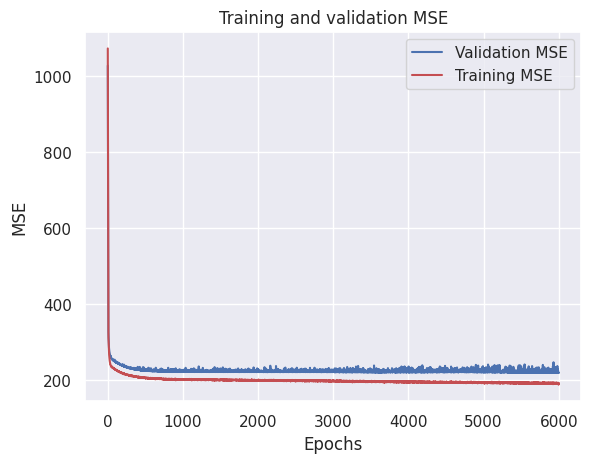

In [ ]:
plt.plot(epochs3, val_mse3, 'b', label='Validation MSE')
plt.plot(epochs3, mse3, 'r', label='Training MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
y_pred = model3.predict(x_test_elasticity)
error = mean_squared_error(y_test_strength, y_pred[:,1], squared=False)
print("Test RMSE = %.4f" % error)

10/10 [==============================] - 0s 1ms/step
Test RMSE = 547.1478


In [ ]:
error = mean_squared_error(y_test_elasticity, y_pred[:,0], squared=False)
print("Test RMSE = %.4f" % error)

Test RMSE = 4.8332


Вывод: две отдельные нейронки, которые определяют соответсвующие значения - лучше, чем одна, которая определяет сразу эти два знаяения. Но разница не такая большая.

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open("strength.sav", 'wb'))

In [ ]:
pickle.dump(model2, open("elastic.sav", 'wb'))

In [ ]:
ls

elastic.sav  sample_data/  strength.sav  X_bp.xlsx  X_nup.xlsx


In [ ]:
model.save('strength.h5')

In [ ]:
model2.save('elastic.h5')

In [ ]:
data=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
menu=['Соотношение матрица-наполнитель', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки',
       'Плотность нашивки']
df=pd.DataFrame([data], columns=menu)


In [ ]:
model2.predict(df)

1/1 [==============================] - 0s 63ms/step


array([[68.453224]], dtype=float32)

In [ ]:
x_train_elasticity

,"модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
339,587.823272,130.165094,25.237530,212.518314,137.077690,0,11.565045,69.516832
456,670.710680,128.294056,25.856843,680.482661,220.701964,0,2.068707,39.098984
617,836.632367,107.693445,22.564346,540.078090,220.849610,90,10.375473,45.836826
35,757.874479,81.379871,23.422465,575.062857,252.870569,90,9.000000,70.000000
558,217.913130,102.259250,26.391928,682.060279,167.666177,90,8.586463,55.063836
...,...,...,...,...,...,...,...,...
320,1110.896831,62.620924,25.334082,362.407115,136.548332,0,5.991188,48.635969
527,966.413784,57.884785,23.909599,11.295224,306.876083,0,6.077479,49.456180
996,598.509918,80.562969,21.160317,474.542057,312.536052,90,7.626517,45.148175
125,627.091103,97.740358,23.961702,237.361035,223.855681,0,4.295857,40.237716
